In [43]:
"""
Classification of thyroid 
using scikit learn
"""

import pandas as pd
import numpy as np


def extract_data(path):
    data_frame = pd.read_csv(path, sep="\t")
    return data_frame

def create_features_target(data_frame):
    target = data_frame[["target"]]
    features = data_frame.drop("target", axis=1)
    return features, target

d_frame = extract_data("data/allbp.tsv")
print(d_frame.shape)
data_features, data_target = create_features_target(d_frame)
data_features = data_features
print(data_features.shape)
print(data_target.shape)

# More information about dataset: https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease
# Link to dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/
# Description: https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names
    

(3772, 30)
(3772, 29)
(3772, 1)


In [44]:
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, 
                                                                                                data_target, test_size=0.33, random_state=42)

print(data_features_train.shape)
print(data_target_train.shape)
print(data_features_test.shape)
print(data_target_test.shape)


(2527, 29)
(2527, 1)
(1245, 29)
(1245, 1)


In [53]:
from sklearn.linear_model import LogisticRegression

# Logistic regression: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
trained_model = LogisticRegression().fit(data_features_train, data_target_train)
prediction = trained_model.predict(data_features_test)
proba_prediction = trained_model.decision_function(data_features_test)
feature_coefficient = trained_model.coef_
print(feature_coefficient)

data_target_test_binary = label_binarize(data_target_test, classes=[0, 1, 2])
n_classes = data_target_test_binary.shape[1]

[[-4.43025863e-02 -8.38036000e-01 -2.74204154e-01 -1.99253622e-02
  -1.17701616e-03 -5.09525373e-02 -6.63260210e-04 -7.69861932e-03
  -3.28105649e-03 -8.14280797e-02 -7.73876879e-02 -3.93182197e-03
  -7.56011832e-02 -2.58846575e-02 -1.63882510e-06  2.10423623e-01
   1.85161902e-01  5.56620707e-03 -1.71527902e-01 -3.13164352e-02
  -9.21657355e-03  2.42667116e-02 -1.04222266e-02 -2.64803949e-01
  -1.04222330e-02  1.36134173e-02  0.00000000e+00  0.00000000e+00
  -2.56632109e-01]
 [-2.20991694e-02 -9.01241443e-01 -8.93716645e-01 -4.07288878e-01
   1.45633521e-01 -4.34711233e-01  8.45988918e-01 -3.01938049e-02
   6.49212593e-01 -6.00986441e-01  1.97392932e-01 -2.20449695e-01
   3.32491375e-01 -7.29079858e-01 -1.35826325e-02 -1.02917699e+00
  -1.62920993e+00 -8.86137680e-03  1.59961218e-01  1.40411502e-02
  -2.48185481e-01 -7.04630847e-03  2.00464005e+00  5.66672168e-02
   1.82656363e+00 -2.51668396e-04  0.00000000e+00  0.00000000e+00
  -1.69273579e-01]
 [ 1.96834278e-02  7.79486896e-01  8.9

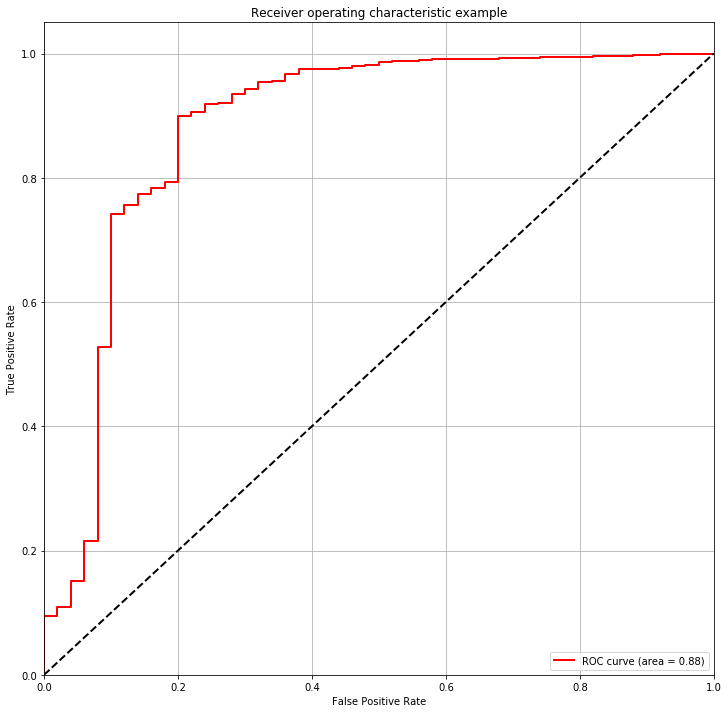

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# plot area under curve
def auc_plot(binarized_labels, probabilistic_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], probabilistic_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), probabilistic_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(12,12))
    lw = 2
    plt.plot(fpr[2], tpr[2], color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

auc_plot(data_target_test_binary, proba_prediction)

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
trained_model = model.fit(data_features_train, data_target_train)
prediction = trained_model.predict(data_features_test)
print("Feature weights:")
print(trained_model.feature_importances_)
prob_pred_rf = model.predict_proba(data_features_test)

Feature weights:
[7.04671698e-02 2.26325175e-02 1.41127054e-02 4.37853099e-05
 2.97739761e-03 3.70081854e-03 4.74372286e-02 2.91123849e-05
 1.76366831e-03 3.88663272e-03 4.88962056e-03 8.20043885e-05
 5.76602973e-03 1.69961171e-02 0.00000000e+00 1.31952932e-03
 6.62832478e-03 8.07176901e-02 3.43617246e-02 1.12070578e-01
 4.44573790e-03 1.21520188e-01 1.11380891e-03 2.50795393e-01
 8.07598329e-03 1.04382750e-01 0.00000000e+00 0.00000000e+00
 7.97834846e-02]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


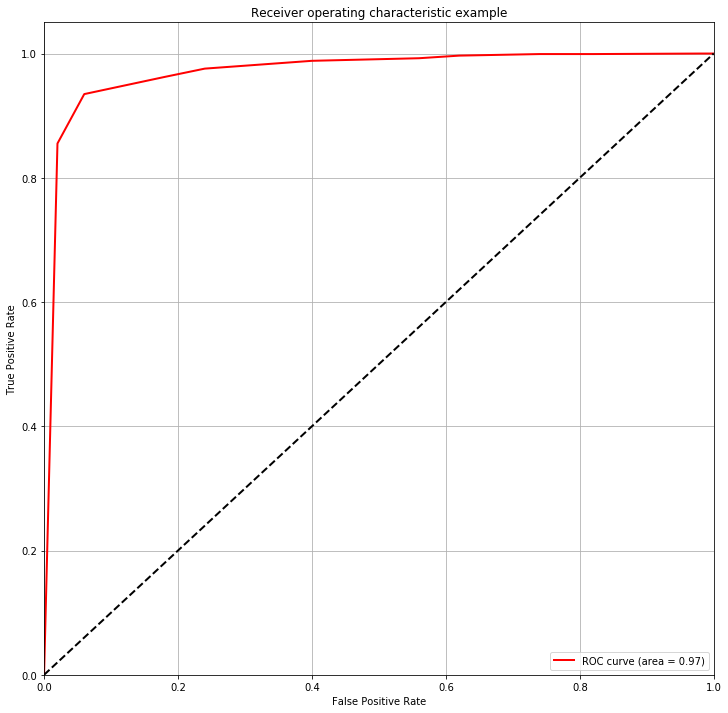

In [82]:
auc_plot(data_target_test_binary, prob_pred_rf)